In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [5]:
df['LotShape']

0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
       ... 
1455    Reg
1456    Reg
1457    Reg
1458    Reg
1459    Reg
Name: LotShape, Length: 1460, dtype: object

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df = pd.get_dummies(df, dtype=int)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [8]:
df = df.fillna(df.mean())  # 결측치를 평균값으로 채움
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [9]:
df_corr = df.corr()
df_corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295


In [10]:
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

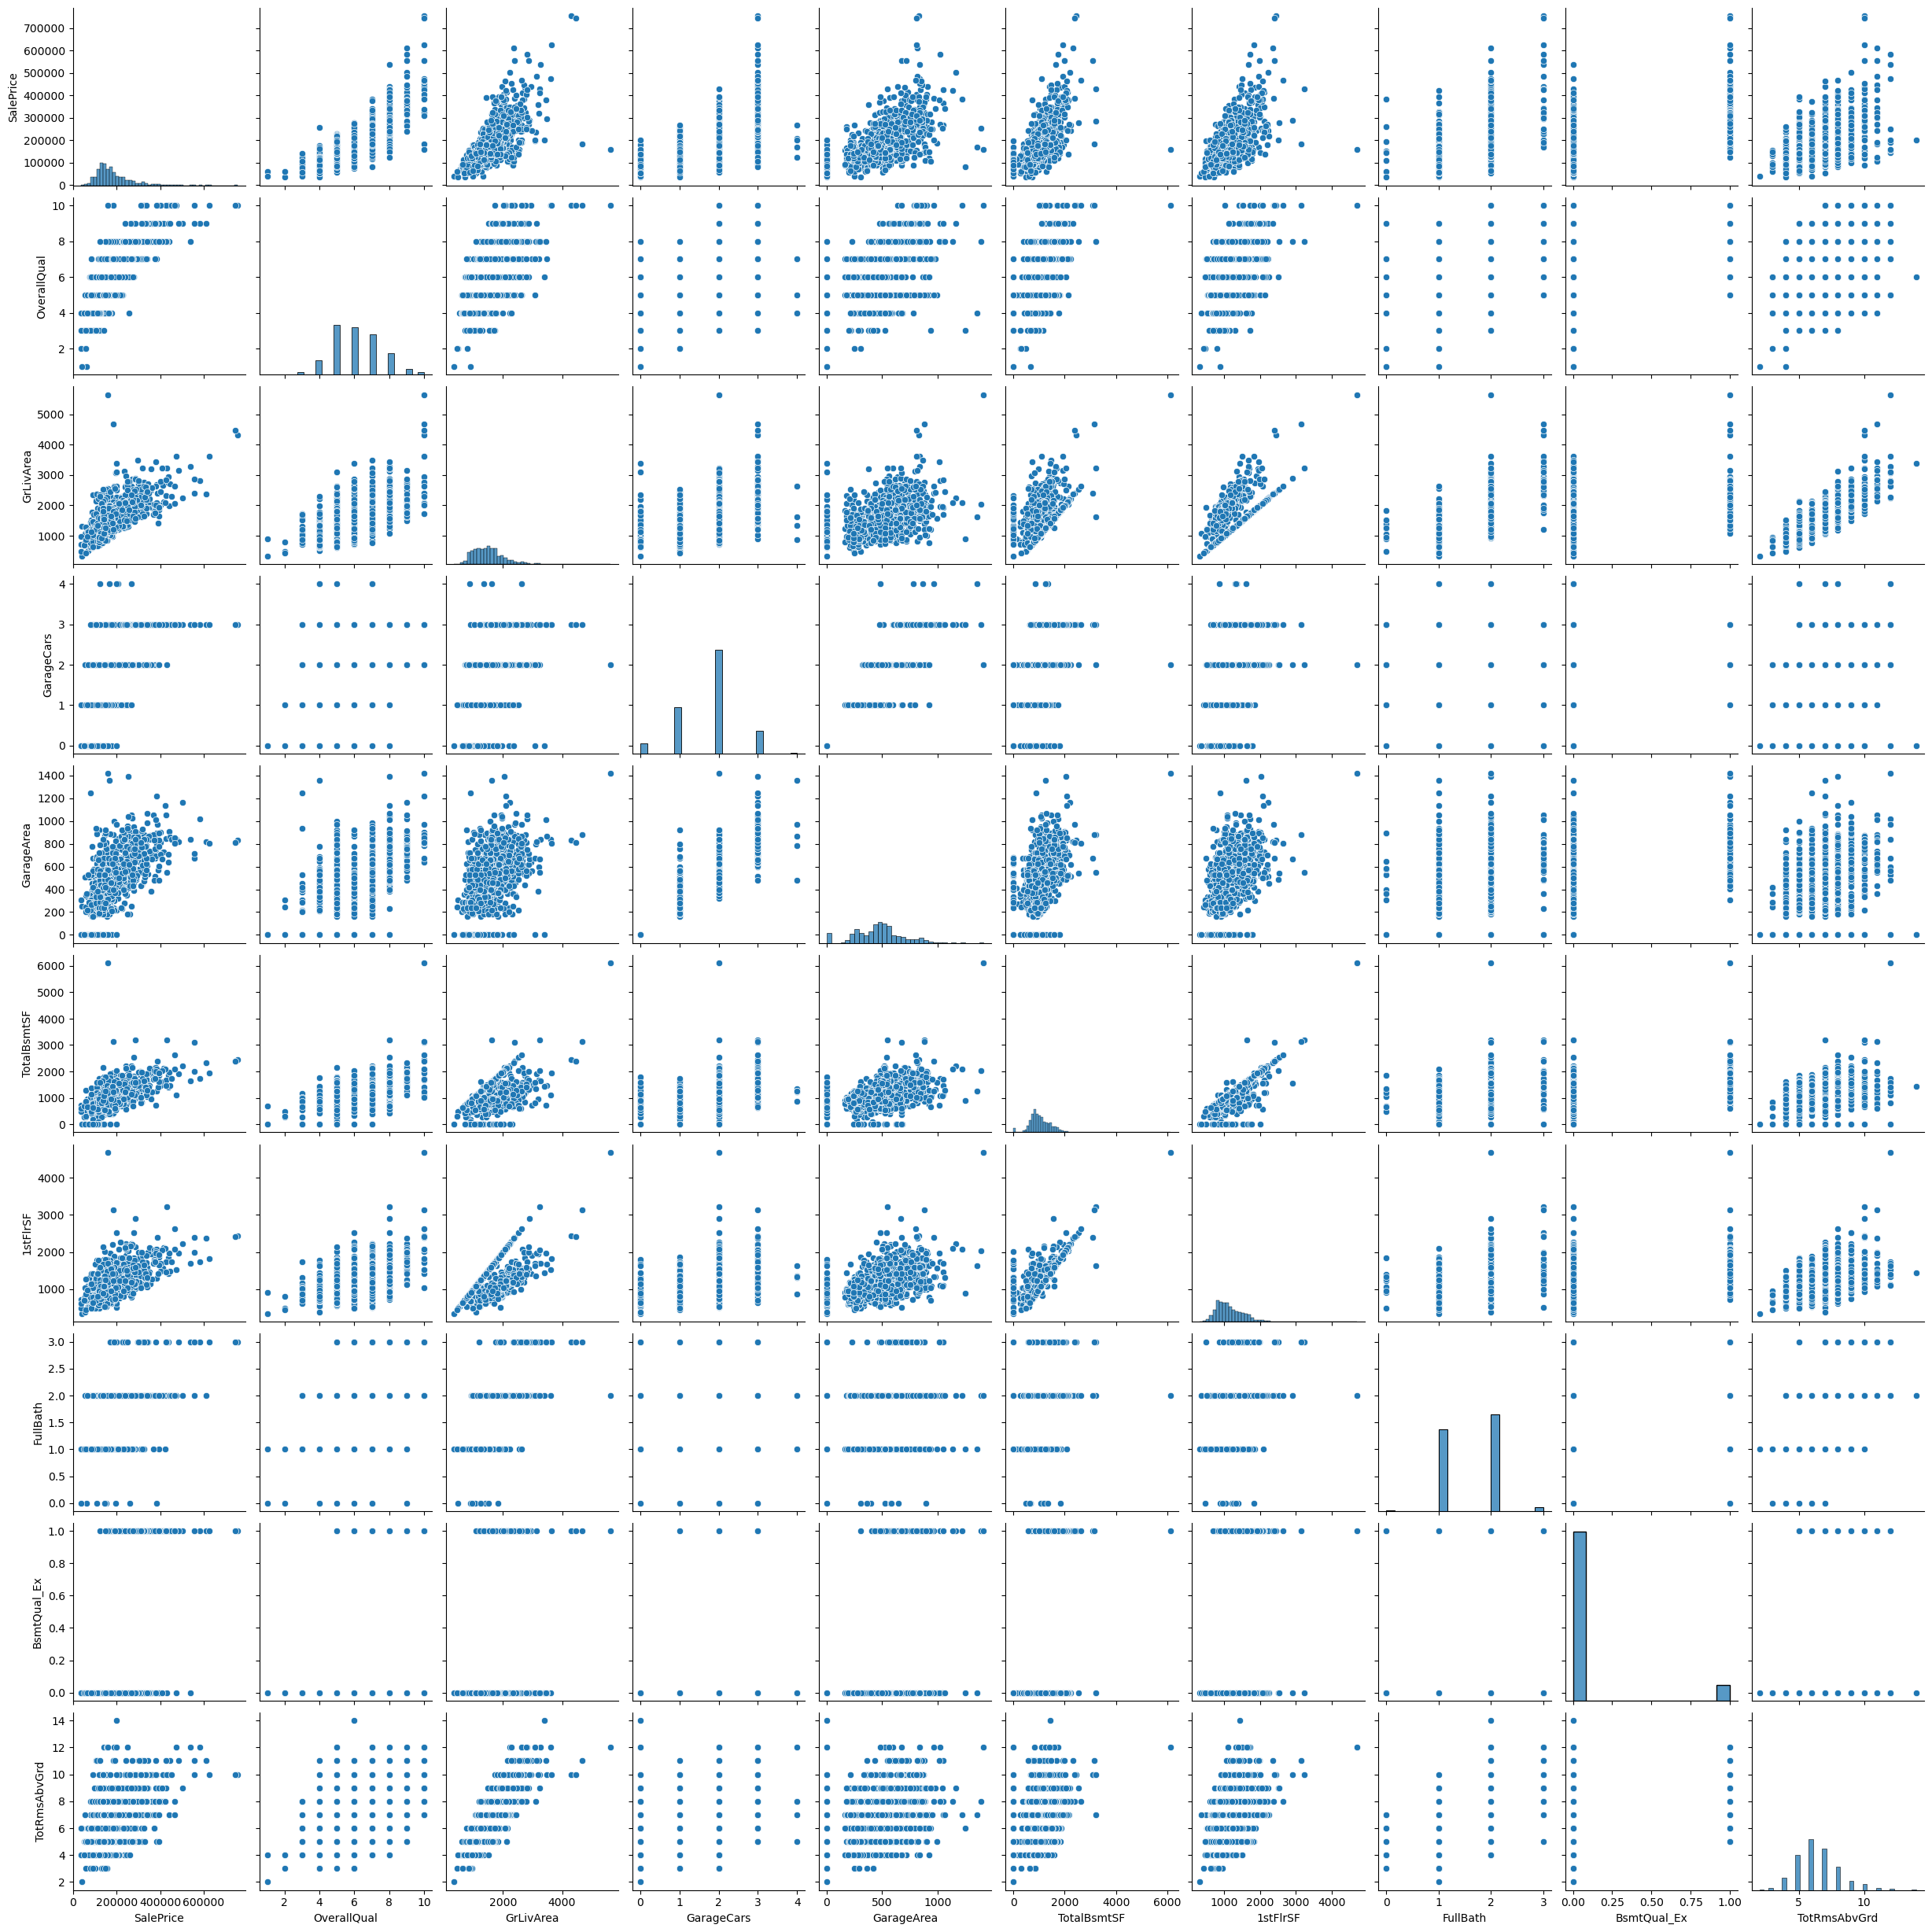

In [11]:
cols = list(df_corr_sort['SalePrice'].head(10).keys())
sns.pairplot(df[cols])
plt.show()

In [12]:
cols_train = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
X_train_pre = df[cols_train]
y = df['SalePrice'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [14]:
X_train.shape

(1168, 6)

In [15]:
model = models.Sequential()
model.add(layers.Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
modelpath = 'model/house.hdf5'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [17]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping, checkpoint])

Epoch 1/2000
28/28 [==============================] - 1s 10ms/step - loss: 39167545344.0000 - val_loss: 38261030912.0000
Epoch 2/2000
28/28 [==============================] - 0s 3ms/step - loss: 38294257664.0000 - val_loss: 36922880000.0000
Epoch 3/2000
28/28 [==============================] - 0s 3ms/step - loss: 36072263680.0000 - val_loss: 33452873728.0000
Epoch 4/2000
28/28 [==============================] - 0s 3ms/step - loss: 31004446720.0000 - val_loss: 26188384256.0000
Epoch 5/2000
28/28 [==============================] - 0s 3ms/step - loss: 21807386624.0000 - val_loss: 14935590912.0000
Epoch 6/2000
28/28 [==============================] - 0s 3ms/step - loss: 10105516032.0000 - val_loss: 4640105984.0000
Epoch 7/2000
28/28 [==============================] - 0s 3ms/step - loss: 3121593344.0000 - val_loss: 2118311552.0000
Epoch 8/2000
28/28 [==============================] - 0s 3ms/step - loss: 2266952704.0000 - val_loss: 2143124096.0000
Epoch 9/2000
28/28 [========================

Epoch 70/2000
28/28 [==============================] - 0s 3ms/step - loss: 2035103872.0000 - val_loss: 1934617344.0000
Epoch 71/2000
28/28 [==============================] - 0s 3ms/step - loss: 2030624128.0000 - val_loss: 1916034304.0000
Epoch 72/2000
28/28 [==============================] - 0s 3ms/step - loss: 2039448320.0000 - val_loss: 1917810432.0000
Epoch 73/2000
28/28 [==============================] - 0s 3ms/step - loss: 2030273152.0000 - val_loss: 1944535040.0000
Epoch 74/2000
28/28 [==============================] - 0s 3ms/step - loss: 2030719616.0000 - val_loss: 1918464000.0000
Epoch 75/2000
28/28 [==============================] - 0s 3ms/step - loss: 2035911808.0000 - val_loss: 1939166080.0000
Epoch 76/2000
28/28 [==============================] - 0s 3ms/step - loss: 2057257088.0000 - val_loss: 1935309056.0000
Epoch 77/2000
28/28 [==============================] - 0s 3ms/step - loss: 2050596992.0000 - val_loss: 1917187456.0000
Epoch 78/2000
28/28 [===========================

28/28 [==============================] - 0s 3ms/step - loss: 1981891072.0000 - val_loss: 1877374336.0000
Epoch 139/2000
28/28 [==============================] - 0s 3ms/step - loss: 1990438400.0000 - val_loss: 1869090432.0000
Epoch 140/2000
28/28 [==============================] - 0s 3ms/step - loss: 1979761664.0000 - val_loss: 1862215040.0000
Epoch 141/2000
28/28 [==============================] - 0s 3ms/step - loss: 1987428096.0000 - val_loss: 1866401152.0000
Epoch 142/2000
28/28 [==============================] - 0s 3ms/step - loss: 2024508800.0000 - val_loss: 1863936512.0000
Epoch 143/2000
28/28 [==============================] - 0s 3ms/step - loss: 1985965056.0000 - val_loss: 1896854016.0000
Epoch 144/2000
28/28 [==============================] - 0s 3ms/step - loss: 1984012288.0000 - val_loss: 1859691904.0000
Epoch 145/2000
28/28 [==============================] - 0s 3ms/step - loss: 1988443392.0000 - val_loss: 1859551232.0000
Epoch 146/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1955308032.0000 - val_loss: 1841822848.0000
Epoch 207/2000
28/28 [==============================] - 0s 3ms/step - loss: 1952387072.0000 - val_loss: 1835285632.0000
Epoch 208/2000
28/28 [==============================] - 0s 3ms/step - loss: 1952182656.0000 - val_loss: 1847369984.0000
Epoch 209/2000
28/28 [==============================] - 0s 3ms/step - loss: 1949526656.0000 - val_loss: 1833698176.0000
Epoch 210/2000
28/28 [==============================] - 0s 3ms/step - loss: 1953563520.0000 - val_loss: 1834569216.0000
Epoch 211/2000
28/28 [==============================] - 0s 3ms/step - loss: 1950491392.0000 - val_loss: 1835281664.0000
Epoch 212/2000
28/28 [==============================] - 0s 3ms/step - loss: 1954313856.0000 - val_loss: 1854552192.0000
Epoch 213/2000
28/28 [==============================] - 0s 3ms/step - loss: 1956072704.0000 - val_loss: 1838713472.0000
Epoch 214/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1943179904.0000 - val_loss: 1814081536.0000
Epoch 275/2000
28/28 [==============================] - 0s 3ms/step - loss: 1949865088.0000 - val_loss: 1816649344.0000
Epoch 276/2000
28/28 [==============================] - 0s 3ms/step - loss: 1951613312.0000 - val_loss: 1812027392.0000
Epoch 277/2000
28/28 [==============================] - 0s 3ms/step - loss: 1946550784.0000 - val_loss: 1816032640.0000
Epoch 278/2000
28/28 [==============================] - 0s 3ms/step - loss: 1939270144.0000 - val_loss: 1826951808.0000
Epoch 279/2000
28/28 [==============================] - 0s 3ms/step - loss: 1944078592.0000 - val_loss: 1818390912.0000
Epoch 280/2000
28/28 [==============================] - 0s 4ms/step - loss: 1960755584.0000 - val_loss: 1809349248.0000
Epoch 281/2000
28/28 [==============================] - 0s 3ms/step - loss: 1944649088.0000 - val_loss: 1810541696.0000
Epoch 282/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1912235008.0000 - val_loss: 1782231168.0000
Epoch 343/2000
28/28 [==============================] - 0s 3ms/step - loss: 1915369600.0000 - val_loss: 1781269632.0000
Epoch 344/2000
28/28 [==============================] - 0s 3ms/step - loss: 1910180480.0000 - val_loss: 1783701632.0000
Epoch 345/2000
28/28 [==============================] - 0s 3ms/step - loss: 1921854720.0000 - val_loss: 1810291712.0000
Epoch 346/2000
28/28 [==============================] - 0s 3ms/step - loss: 1932102912.0000 - val_loss: 1777888768.0000
Epoch 347/2000
28/28 [==============================] - 0s 3ms/step - loss: 1911417856.0000 - val_loss: 1803637632.0000
Epoch 348/2000
28/28 [==============================] - 0s 3ms/step - loss: 1919862400.0000 - val_loss: 1783149440.0000
Epoch 349/2000
28/28 [==============================] - 0s 3ms/step - loss: 1911196416.0000 - val_loss: 1772730752.0000
Epoch 350/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1920862464.0000 - val_loss: 1777858048.0000
Epoch 411/2000
28/28 [==============================] - 0s 4ms/step - loss: 1910758912.0000 - val_loss: 1755588480.0000
Epoch 412/2000
28/28 [==============================] - 0s 3ms/step - loss: 1906258688.0000 - val_loss: 1754268800.0000
Epoch 413/2000
28/28 [==============================] - 0s 3ms/step - loss: 1894896768.0000 - val_loss: 1767391488.0000
Epoch 414/2000
28/28 [==============================] - 0s 3ms/step - loss: 1900273024.0000 - val_loss: 1754708480.0000
Epoch 415/2000
28/28 [==============================] - 0s 3ms/step - loss: 1897352192.0000 - val_loss: 1752339200.0000
Epoch 416/2000
28/28 [==============================] - 0s 3ms/step - loss: 1893462400.0000 - val_loss: 1766586496.0000
Epoch 417/2000
28/28 [==============================] - 0s 3ms/step - loss: 1890859136.0000 - val_loss: 1751937024.0000
Epoch 418/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1878386432.0000 - val_loss: 1740738688.0000
Epoch 479/2000
28/28 [==============================] - 0s 3ms/step - loss: 1894584832.0000 - val_loss: 1768627712.0000
Epoch 480/2000
28/28 [==============================] - 0s 3ms/step - loss: 1871069440.0000 - val_loss: 1734311936.0000
Epoch 481/2000
28/28 [==============================] - 0s 3ms/step - loss: 1907886720.0000 - val_loss: 1756225536.0000
Epoch 482/2000
28/28 [==============================] - 0s 3ms/step - loss: 1884031360.0000 - val_loss: 1745588096.0000
Epoch 483/2000
28/28 [==============================] - 0s 3ms/step - loss: 1871827968.0000 - val_loss: 1735756672.0000
Epoch 484/2000
28/28 [==============================] - 0s 3ms/step - loss: 1875147136.0000 - val_loss: 1743153408.0000
Epoch 485/2000
28/28 [==============================] - 0s 3ms/step - loss: 1875441024.0000 - val_loss: 1741892608.0000
Epoch 486/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1878102016.0000 - val_loss: 1794846592.0000
Epoch 547/2000
28/28 [==============================] - 0s 3ms/step - loss: 1874093440.0000 - val_loss: 1725460864.0000
Epoch 548/2000
28/28 [==============================] - 0s 3ms/step - loss: 1863439232.0000 - val_loss: 1727998848.0000
Epoch 549/2000
28/28 [==============================] - 0s 3ms/step - loss: 1863813888.0000 - val_loss: 1755717120.0000
Epoch 550/2000
28/28 [==============================] - 0s 3ms/step - loss: 1849685376.0000 - val_loss: 1736291328.0000
Epoch 551/2000
28/28 [==============================] - 0s 3ms/step - loss: 1878925056.0000 - val_loss: 1777406592.0000
Epoch 552/2000
28/28 [==============================] - 0s 3ms/step - loss: 1867991296.0000 - val_loss: 1729740544.0000
Epoch 553/2000
28/28 [==============================] - 0s 3ms/step - loss: 1854622208.0000 - val_loss: 1726252928.0000
Epoch 554/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1849348736.0000 - val_loss: 1725877376.0000
Epoch 615/2000
28/28 [==============================] - 0s 3ms/step - loss: 1872858880.0000 - val_loss: 1723905664.0000
Epoch 616/2000
28/28 [==============================] - 0s 3ms/step - loss: 1861176576.0000 - val_loss: 1713484032.0000
Epoch 617/2000
28/28 [==============================] - 0s 3ms/step - loss: 1861149184.0000 - val_loss: 1778484736.0000
Epoch 618/2000
28/28 [==============================] - 0s 3ms/step - loss: 1859081344.0000 - val_loss: 1723621760.0000
Epoch 619/2000
28/28 [==============================] - 0s 3ms/step - loss: 1852007680.0000 - val_loss: 1718933888.0000
Epoch 620/2000
28/28 [==============================] - 0s 3ms/step - loss: 1843028224.0000 - val_loss: 1713643008.0000
Epoch 621/2000
28/28 [==============================] - 0s 3ms/step - loss: 1865498240.0000 - val_loss: 1752409856.0000
Epoch 622/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1841460864.0000 - val_loss: 1701803904.0000
Epoch 683/2000
28/28 [==============================] - 0s 3ms/step - loss: 1852226048.0000 - val_loss: 1712402944.0000
Epoch 684/2000
28/28 [==============================] - 0s 3ms/step - loss: 1860558080.0000 - val_loss: 1710472192.0000
Epoch 685/2000
28/28 [==============================] - 0s 3ms/step - loss: 1851729152.0000 - val_loss: 1700871808.0000
Epoch 686/2000
28/28 [==============================] - 0s 3ms/step - loss: 1850641664.0000 - val_loss: 1712779776.0000
Epoch 687/2000
28/28 [==============================] - 0s 3ms/step - loss: 1836267904.0000 - val_loss: 1709047296.0000
Epoch 688/2000
28/28 [==============================] - 0s 3ms/step - loss: 1924444928.0000 - val_loss: 1700164992.0000
Epoch 689/2000
28/28 [==============================] - 0s 3ms/step - loss: 1857619712.0000 - val_loss: 1702012288.0000
Epoch 690/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1852065792.0000 - val_loss: 1699099520.0000
Epoch 751/2000
28/28 [==============================] - 0s 3ms/step - loss: 1836335872.0000 - val_loss: 1714371456.0000
Epoch 752/2000
28/28 [==============================] - 0s 3ms/step - loss: 1842500480.0000 - val_loss: 1692477312.0000
Epoch 753/2000
28/28 [==============================] - 0s 3ms/step - loss: 1832474240.0000 - val_loss: 1694664192.0000
Epoch 754/2000
28/28 [==============================] - 0s 3ms/step - loss: 1829008128.0000 - val_loss: 1706247168.0000
Epoch 755/2000
28/28 [==============================] - 0s 3ms/step - loss: 1834407040.0000 - val_loss: 1692993792.0000
Epoch 756/2000
28/28 [==============================] - 0s 3ms/step - loss: 1828350976.0000 - val_loss: 1715464064.0000
Epoch 757/2000
28/28 [==============================] - 0s 3ms/step - loss: 1852413312.0000 - val_loss: 1713683200.0000
Epoch 758/2000
28/28 [==============================] -

28/28 [==============================] - 0s 3ms/step - loss: 1825923072.0000 - val_loss: 1717320192.0000
Epoch 819/2000
28/28 [==============================] - 0s 3ms/step - loss: 1852035328.0000 - val_loss: 1687257600.0000
Epoch 820/2000
28/28 [==============================] - 0s 3ms/step - loss: 1838028928.0000 - val_loss: 1708966016.0000
Epoch 821/2000
28/28 [==============================] - 0s 3ms/step - loss: 1831768448.0000 - val_loss: 1682428928.0000
Epoch 822/2000
28/28 [==============================] - 0s 3ms/step - loss: 1835021312.0000 - val_loss: 1683157248.0000
Epoch 823/2000
28/28 [==============================] - 0s 3ms/step - loss: 1822694272.0000 - val_loss: 1709134464.0000
Epoch 824/2000
28/28 [==============================] - 0s 3ms/step - loss: 1828797952.0000 - val_loss: 1682971776.0000
Epoch 825/2000
28/28 [==============================] - 0s 3ms/step - loss: 1824375936.0000 - val_loss: 1686558336.0000
Epoch 826/2000
28/28 [==============================] -

In [20]:
real_price = []
pred_price = []
X_num = []

n_iter = 0
y_prediction = model.predict(X_test).flatten()

for i in range(50):
    real = y_test[i]
    prediction = y_prediction[i]
    print('실제가격: {:.2f}, 예상가격: {:.2f}'.format(real, prediction))
    real_price.append(real)
    pred_price.append(prediction)
    n_iter += 1
    X_num.append(n_iter)

10/10 [==============================] - 0s 1ms/step
실제가격: 167000.00, 예상가격: 186998.09
실제가격: 181500.00, 예상가격: 185953.94
실제가격: 122500.00, 예상가격: 173792.66
실제가격: 394432.00, 예상가격: 293674.03
실제가격: 159000.00, 예상가격: 205802.92
실제가격: 222500.00, 예상가격: 214133.78
실제가격: 129000.00, 예상가격: 227779.41
실제가격: 140000.00, 예상가격: 133810.14
실제가격: 130000.00, 예상가격: 189245.38
실제가격: 242000.00, 예상가격: 187158.48
실제가격: 119900.00, 예상가격: 153833.78
실제가격: 143000.00, 예상가격: 193450.66
실제가격: 125500.00, 예상가격: 121730.02
실제가격: 122000.00, 예상가격: 152408.12
실제가격: 117000.00, 예상가격: 207323.56
실제가격: 155835.00, 예상가격: 181091.06
실제가격: 141000.00, 예상가격: 135137.84
실제가격: 410000.00, 예상가격: 345752.00
실제가격: 88000.00, 예상가격: 133304.23
실제가격: 139000.00, 예상가격: 150553.61
실제가격: 219210.00, 예상가격: 225179.42
실제가격: 256300.00, 예상가격: 245798.42
실제가격: 315000.00, 예상가격: 290256.34
실제가격: 174000.00, 예상가격: 162879.53
실제가격: 143000.00, 예상가격: 203403.88
실제가격: 83000.00, 예상가격: 117060.64
실제가격: 143000.00, 예상가격: 143747.03
실제가격: 131000.00, 예상가격: 146753.34
실제가격: 109008.00, 예상가격: 13

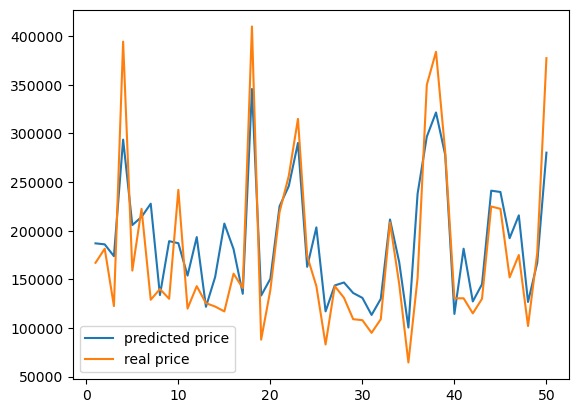

In [21]:
plt.plot(X_num, pred_price, label='predicted price')
plt.plot(X_num, real_price, label='real price')
plt.legend()
plt.show()